# Case Study - Lending Loan                                  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        Group ID: 74994


## Aim
#### Identify the risky loan applicants that cause the credit loss to the company, using EDA.
#### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

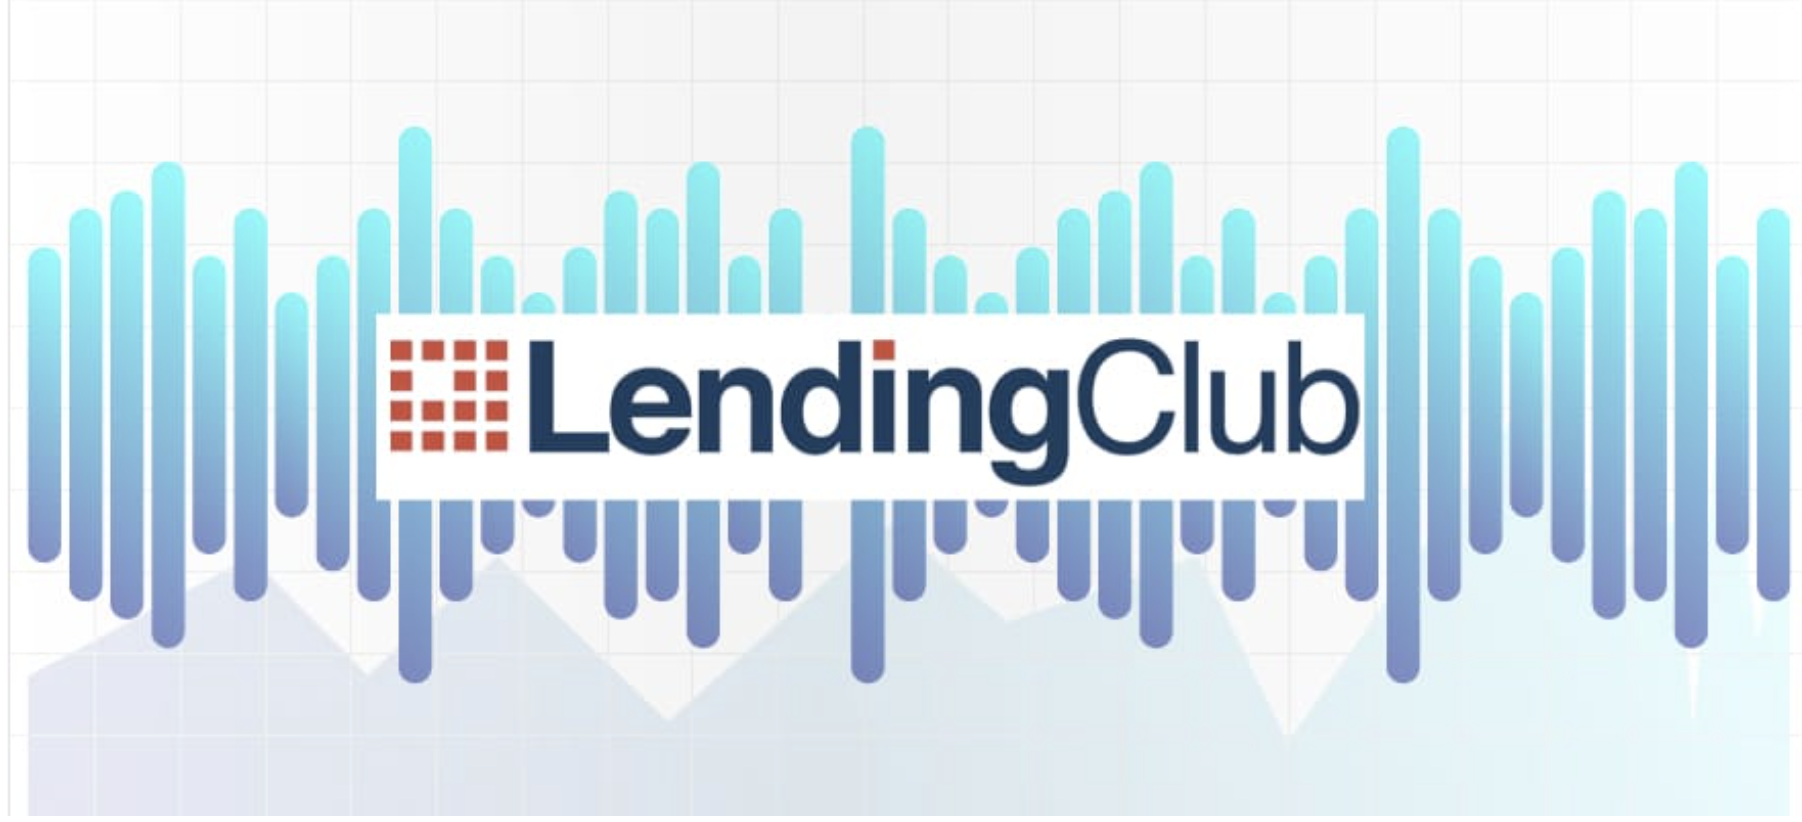

## Observations
#### Using EDA techniques following steps are being performed on the data supplied

In [59]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [72]:
data = pd.read_csv('loan.csv')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [61]:
data.shape

(39717, 111)

In [73]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [63]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [31]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Cleaning

#### Check for duplicate rows in dataset based on id column

In [74]:
# Check for duplicate rows in dataset based on id column
print(data.duplicated(subset=None, keep='first').count())
duplicate_rows=data[data.duplicated(['id'])]
duplicate_rows
#Below output shows no duplicate rows



39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


#### EDA: Treating Missing Values

#### Checking for null rows in the filtered column.

In [75]:
#Need to fix missing values
missing_values = data.isnull().sum()
missing_values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [76]:
total_missing = pd.DataFrame({'column_name': data.columns,'missing_values': missing_values})
(total_missing['missing_values'] == 39717).sum()

54

In [77]:
#The above have all N/A-->These wouldnt serve much purpose, So dropping them
df_post_null_drops = data.drop(missing_columns, axis=1)
df_post_null_drops

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [78]:
#Also there are some fields that have all same values, which will not make any difference in analysis:
#delinq_amnt, acc_now_delinq, chargeoff_within_12_mths, tax_liens, collections_12_mths_ex_med
#pymnt_plan(all n), initial_list_status(all f), policy_code(all 1), application_type(all individual),
columns_dropped_data1 = df_post_null_drops.drop(['delinq_amnt', 'acc_now_delinq', 'application_type', 'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med'],axis=1)
columns_dropped_data1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


In [79]:
#Now lets see if there are any other columns that we wont require:
#remaining columns info
print(columns_dropped_data1.info(max_cols=100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [80]:
#Checking for null rows
missing_rows = columns_dropped_data1.isnull().sum()
missing_rows

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [81]:
#The below have close to 50% data as null, lets remove them
#desc, mths_since_last_delinq, mths_since_last_record, next_pymnt_d

columns_dropped_data2 = columns_dropped_data1.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'],axis=1)
columns_dropped_data2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [82]:
columns_dropped_data2.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prnc

In [83]:
# Printing all the count of rows having null values
print(columns_dropped_data2.emp_title.isnull().sum())
print(columns_dropped_data2.emp_length.isnull().sum())
print(columns_dropped_data2.pub_rec_bankruptcies.isnull().sum())
columns_dropped_data2.shape

2459
1075
697


(39717, 44)

In [84]:
#emp_title has the next highest number of missing values.It has information about the customer/borrower like their job title, this can't be imputed. lets remove the missing rows:
columns_dropped_data2=columns_dropped_data2[~columns_dropped_data2['emp_title'].isnull()]
columns_dropped_data2.shape

(37258, 44)

In [85]:
#Similary emp_length has the next highest number of missing values, has details on employment length in years. lets remove the missing rows:
columns_dropped_data2=columns_dropped_data2[~columns_dropped_data2['emp_length'].isnull()]
columns_dropped_data2.shape

(37202, 44)

In [86]:
# Impute the "Not Known" into the pub_rec_bankruptcies
columns_dropped_data2['pub_rec_bankruptcies'].fillna('Not-Known', inplace=True)

In [87]:
print(columns_dropped_data2['pub_rec_bankruptcies'].isnull().sum())

0


In [88]:

#title gives the title of the loan specified by the borrower in the application.
#revol_util gives the revolving line utelization and
#last_pymnt_d gives the month in which last payment was received.#removing missing rows on above:
columns_dropped_data2=columns_dropped_data2[~columns_dropped_data2.title.isnull()]
columns_dropped_data2=columns_dropped_data2[~columns_dropped_data2.revol_util.isnull()]
columns_dropped_data2=columns_dropped_data2[~columns_dropped_data2.last_pymnt_d.isnull()]
columns_dropped_data2.shape



(37087, 44)

In [89]:
#now no null/missing rows:
columns_dropped_data2.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

### There are a few columns having all unique values.

#### These columns are:

#### member_id : is a random number given to the member, does not contribute to analysis

#### url :is a URL for LC page for corresponding to each memberid, nothing to do with loan default.

#### zip_code :first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis

#### funded_amnt :value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.

#### funded_amnt_inv :value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

#### next_pymnt_d: Next scheduled payment date

In [90]:
columns_dropped_data3 = columns_dropped_data2.drop(['member_id' ,'url','zip_code'],axis=1)
columns_dropped_data3.shape

(37087, 41)

In [91]:
columns_dropped_data3.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [92]:
columns_dropped_data3.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp           

In [ ]:
#Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's remove rows that are current.
#columns_dropped_data2 = columns_dropped_data2[~(columns_dropped_data2['loan_status'] == 'Current')]
#columns_dropped_data2.head()

In [ ]:
#[‘total_pymnt’,’total_pymnt_inv’,’total_rec_prncp’,’total_rec_int’,’total_rec_late_fee’,’recoveries’]
#columns_dropped_data3 = columns_dropped_data2.drop(['total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries'],axis=1)
#columns_dropped_data3.shape

In [ ]:
columns_dropped_data3.shape

### EDA: Standarizing the data with different units of measurements

In [93]:
# Removing % from the int_rate column & converting the datatype
columns_dropped_data3['int_rate'] =columns_dropped_data3['int_rate'].str.rstrip('%')
columns_dropped_data3['int_rate'] =columns_dropped_data3['int_rate'].astype(float)
columns_dropped_data3['int_rate']

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39716    13.75
Name: int_rate, Length: 37087, dtype: float64

In [94]:
# Removing % from the revol_util column & converting the datatype
columns_dropped_data3['revol_util'] =columns_dropped_data3['revol_util'].str.rstrip('%')
columns_dropped_data3['revol_util'] =columns_dropped_data3['revol_util'].astype(float)
columns_dropped_data3['revol_util']

1         9.4
3        21.0
4        53.9
5        28.3
6        85.6
         ... 
39710     0.6
39711    23.0
39712    13.1
39713    26.9
39716    51.5
Name: revol_util, Length: 37087, dtype: float64

### EDA: (Derived Metrics) Deriving the Column from date into month & year

In [95]:
#issue_d

columns_dropped_data3['issue_d'] = pd.to_datetime(columns_dropped_data3['issue_d'], format='%b-%y')
columns_dropped_data3['issue_d_year']=columns_dropped_data3['issue_d'].dt.year
columns_dropped_data3['issue_d_month']=columns_dropped_data3['issue_d'].dt.month
columns_dropped_data3.head()
#two new columns will be added

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,2011,12
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,2011,12
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,2011,12
6,1069639,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,...,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,2011,12


In [96]:
#last_pymnt_d

columns_dropped_data3['last_pymnt_d'] = pd.to_datetime(columns_dropped_data3['last_pymnt_d'], format='%b-%y')
columns_dropped_data3['last_pymnt_d_year']=columns_dropped_data3['last_pymnt_d'].dt.year
columns_dropped_data3['last_pymnt_d_month']=columns_dropped_data3['last_pymnt_d'].dt.month
columns_dropped_data3.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,117.08,1.11,2013-04-01,119.66,Sep-13,0.0,2011,12,2013,4
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,0.00,2015-01-01,357.48,Apr-16,0.0,2011,12,2015,1
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,0.00,0.00,2016-05-01,67.79,May-16,0.0,2011,12,2016,5
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,0.00,0.00,2015-01-01,161.03,Jan-16,0.0,2011,12,2015,1
6,1069639,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,...,0.00,0.00,2016-05-01,1313.76,May-16,0.0,2011,12,2016,5


In [97]:
#last_credit_pull_d

columns_dropped_data3['last_credit_pull_d'] = pd.to_datetime(columns_dropped_data3['last_credit_pull_d'], format='%b-%y')
columns_dropped_data3['last_credit_pull_d_year']=columns_dropped_data3['last_credit_pull_d'].dt.year
columns_dropped_data3['last_credit_pull_d_month']=columns_dropped_data3['last_credit_pull_d'].dt.month
columns_dropped_data3.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,2013-04-01,119.66,2013-09-01,0.0,2011,12,2013,4,2013,9
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,2015-01-01,357.48,2016-04-01,0.0,2011,12,2015,1,2016,4
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,2016-05-01,67.79,2016-05-01,0.0,2011,12,2016,5,2016,5
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,2015-01-01,161.03,2016-01-01,0.0,2011,12,2015,1,2016,1
6,1069639,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,...,2016-05-01,1313.76,2016-05-01,0.0,2011,12,2016,5,2016,5


In [98]:
#last_credit_pull_d

columns_dropped_data3['earliest_cr_line'] = pd.to_datetime(columns_dropped_data3['earliest_cr_line'], format='%b-%y')
columns_dropped_data3['earliest_cr_line_year']=columns_dropped_data3['earliest_cr_line'].dt.year
columns_dropped_data3['earliest_cr_line_month']=columns_dropped_data3['earliest_cr_line'].dt.month
columns_dropped_data3.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,earliest_cr_line_year,earliest_cr_line_month
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,2013-09-01,0.0,2011,12,2013,4,2013,9,1999,4
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,2016-04-01,0.0,2011,12,2015,1,2016,4,1996,2
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,2016-05-01,0.0,2011,12,2016,5,2016,5,1996,1
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,2016-01-01,0.0,2011,12,2015,1,2016,1,2004,11
6,1069639,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,...,2016-05-01,0.0,2011,12,2016,5,2016,5,2005,7


In [113]:
columns_dropped_data3[columns_dropped_data3['earliest_cr_line_year'] > 2016 ]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,earliest_cr_line_year,earliest_cr_line_month


In [108]:
# Rectification of the incorrect year where it shows 2068 instead of 1968
columns_dropped_data3.loc[columns_dropped_data3['earliest_cr_line_year'] > 2008 , 'earliest_cr_line_year'] = columns_dropped_data3['earliest_cr_line_year'] - 100
columns_dropped_data3.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,earliest_cr_line_year,earliest_cr_line_month
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,2013-09-01,0.0,2011,12,2013,4,2013,9,1999,4
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,2016-04-01,0.0,2011,12,2015,1,2016,4,1996,2
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,2016-05-01,0.0,2011,12,2016,5,2016,5,1996,1
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,2016-01-01,0.0,2011,12,2015,1,2016,1,2004,11
6,1069639,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,...,2016-05-01,0.0,2011,12,2016,5,2016,5,2005,7


In [114]:
columns_dropped_data3.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_title                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
title                               object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc   

### EDA: Univariate Analysis

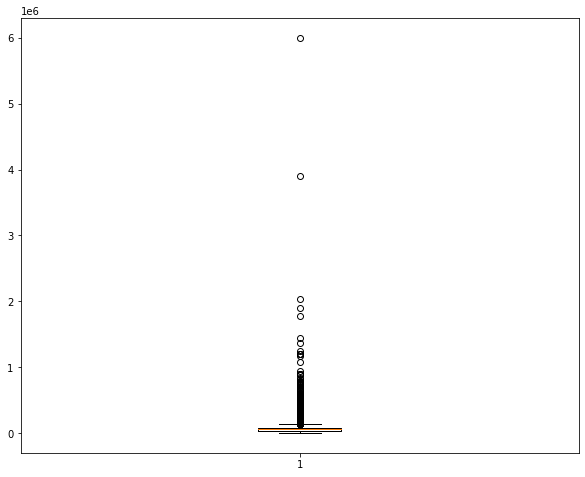

In [118]:
plt.figure(figsize=[10,8])
plt.boxplot(columns_dropped_data3.annual_inc)
plt.show()

In [125]:
print(f"25th Percentile of annual_inc: {np.percentile(columns_dropped_data3.annual_inc,25)}")
print(f"50th Percentile of annual_inc: {np.percentile(columns_dropped_data3.annual_inc,50)}")
print(f"75th Percentile of annual_inc: {np.percentile(columns_dropped_data3.annual_inc,75)}")
print(f"Maximum annual_inc: {np.max(columns_dropped_data3.annual_inc)}")
print(f"Minimum annual_inc: {np.min(columns_dropped_data3.annual_inc)}")


25th Percentile of annual_inc: 41676.0
50th Percentile of annual_inc: 60000.0
75th Percentile of annual_inc: 83000.0
Maximum annual_inc: 6000000.0
Minimum annual_inc: 4000.0


In [176]:
np.percentile(columns_dropped_data.annual_inc, 99)

234999.36

In [177]:
df_ann_inc1 = columns_dropped_data3[columns_dropped_data3.annual_inc <= 234999.36]

In [178]:
df_ann_inc1.annual_inc.describe()

count     36732.000000
mean      65948.244539
std       34722.147698
min        4000.000000
25%       41187.000000
50%       59500.000000
75%       81600.000000
max      234996.000000
Name: annual_inc, dtype: float64

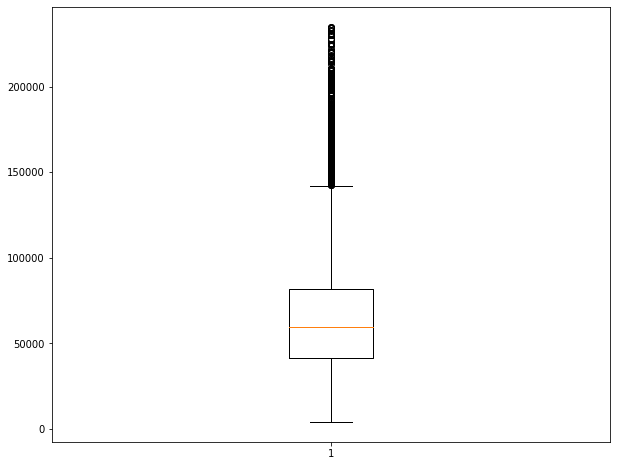

In [179]:
plt.figure(figsize=[10,8])
plt.boxplot(df_ann_inc1.annual_inc)
plt.show()

#### Observations for annual_inc

 * There were few outliers that caused the skewness in the data - therefore, removing those value has plotted above box plot.

#### Univariate Categorical Unordered Variables Analysis

<AxesSubplot:>

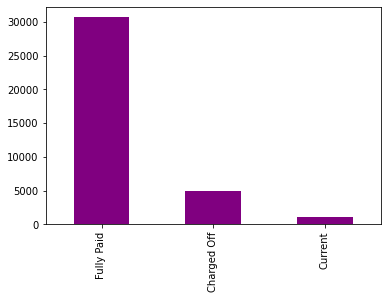

In [201]:
df_ann_inc1.loan_status.value_counts().plot.bar(color='purple')

<AxesSubplot:>

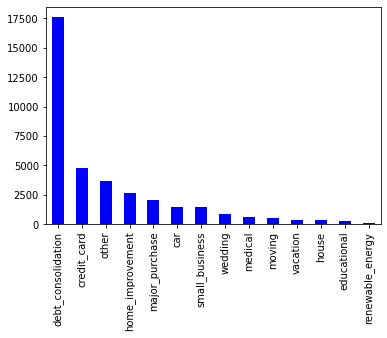

In [200]:
## Column: purpose
df_ann_inc1.purpose.value_counts().plot.bar(color='blue')

<AxesSubplot:>

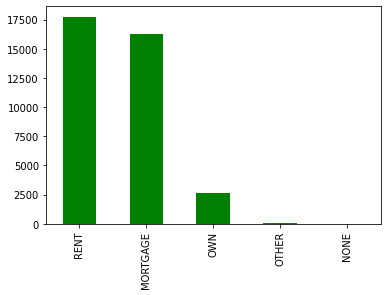

In [189]:
## Column: home_ownership
df_ann_inc1.home_ownership.value_counts().plot.bar(color='g')

<AxesSubplot:>

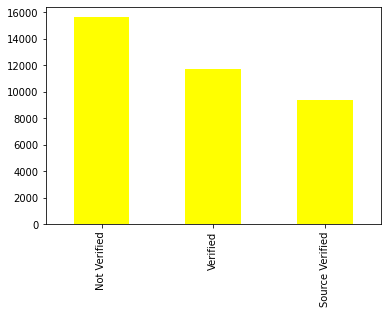

In [192]:
## Column: verification_status
df_ann_inc1.verification_status.value_counts().plot.bar(color='yellow')

<AxesSubplot:>

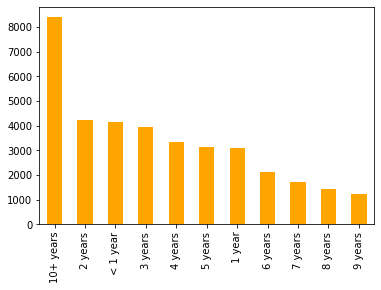

In [197]:
df_ann_inc1.emp_length.value_counts().plot.bar(color='orange')

In [ ]:
### Observation
* 

#### Univariate Categorical Ordered Analysis

<AxesSubplot:>

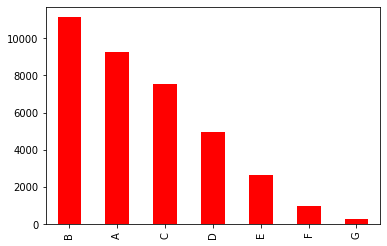

In [195]:
## Column: grade
df_ann_inc1.grade.value_counts().plot.bar(color='red')

### EDA: Segmented Univariate Analysis

### EDA: Bivariate Analysis

In [ ]:
# Checking the relationship between: loan_status & verification status

# Observation:
# There is a significant total number of applicants that are under "Not Verified" category.
# Overall no. of applicants that have fully paid are >75%

### EDA: Derived Metrics

## TODO LIST

In [ ]:
# segmented Univariate Analysis on issue_d
# Segmented Univariate Analysis on annual_inc [4000 100000] and then assicate it with other columns to check the loan_status
# emp_lenght can be also used for segmented analysis in associate with loan_status (bivariate analysis)

# Conclsion